In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\91994\Desktop\My Practice\Football_Data_Merged_Cleaned.csv")

## 1. Performance Analysis

## Business Question 1: How does the total number of goals scored correlate with the number of yellow and red cards a player receives over the season?

                 goals  yellow_cards  red_cards
goals         1.000000      0.028500  -0.014683
yellow_cards  0.028500      1.000000   0.009496
red_cards    -0.014683      0.009496   1.000000


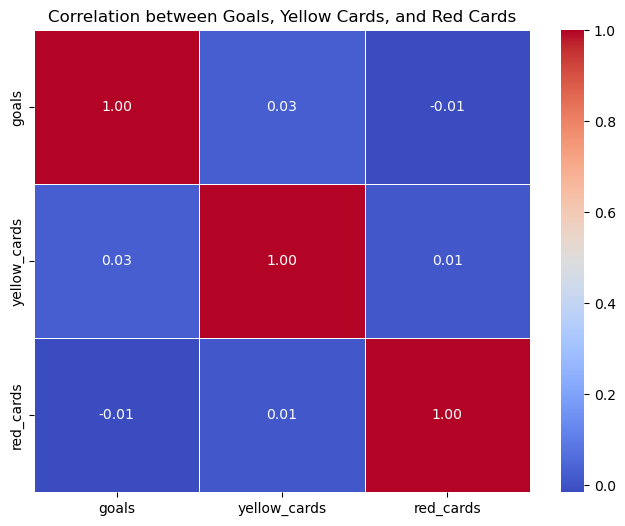

In [7]:
# Correlation between goals, yellow cards, and red cards
correlation_matrix = df[['goals', 'yellow_cards', 'red_cards']].corr()
print(correlation_matrix)

# Plotting correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Goals, Yellow Cards, and Red Cards')
plt.show()

##### Goals and Yellow Cards: The correlation coefficient is 0.03, indicating a very weak positive correlation. This suggests that there is a slight tendency for teams with more goals to also receive more yellow cards, but the relationship is minimal.
##### Goals and Red Cards: The correlation coefficient is -0.01, indicating a negligible negative correlation. This suggests that there is virtually no relationship between the number of goals scored and the number of red cards received.
##### Yellow Cards and Red Cards: The correlation coefficient is 0.01, indicating a negligible positive correlation. This suggests that there is a very slight tendency for teams with more yellow cards to also receive more red cards, but the relationship is minimal.

## Business Question 2: Does a player’s minutes played have a direct correlation with their ability to score or assist in matches?

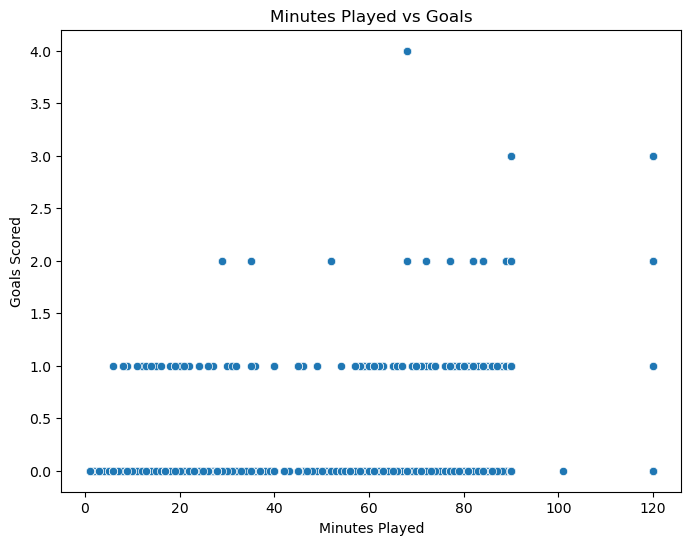

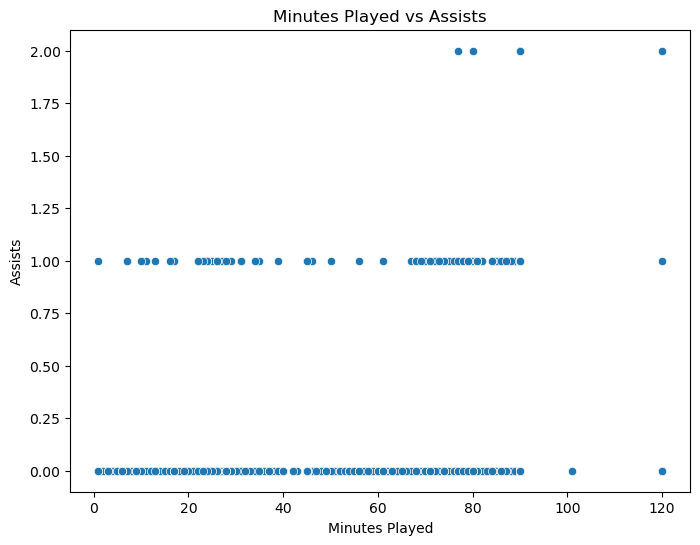

In [19]:
# Plotting scatter plot for Minutes Played vs Goals
plt.figure(figsize=(8, 6))
sns.scatterplot(x='minutes_played', y='goals', data=df)  # Corrected 'df' to 'data'
plt.title('Minutes Played vs Goals')
plt.xlabel('Minutes Played')
plt.ylabel('Goals Scored')
plt.show()

# Plotting scatter plot for Minutes Played vs Assists
plt.figure(figsize=(8, 6))
sns.scatterplot(x='minutes_played', y='assists', data=df)
plt.title('Minutes Played vs Assists')
plt.xlabel('Minutes Played')
plt.ylabel('Assists')
plt.show()

#### There appears to be a positive correlation between minutes played and goals scored. This is evident from the general trend of the points moving upwards as the minutes played increase.
#### There appears to be a positive correlation between minutes played and assists. This is evident from the general trend of the points moving upwards as the minutes played increase.

## 2. Player Profile and Market Value
# Business Question 1: How does a player’s market value change with the number of goals and assists they achieve?

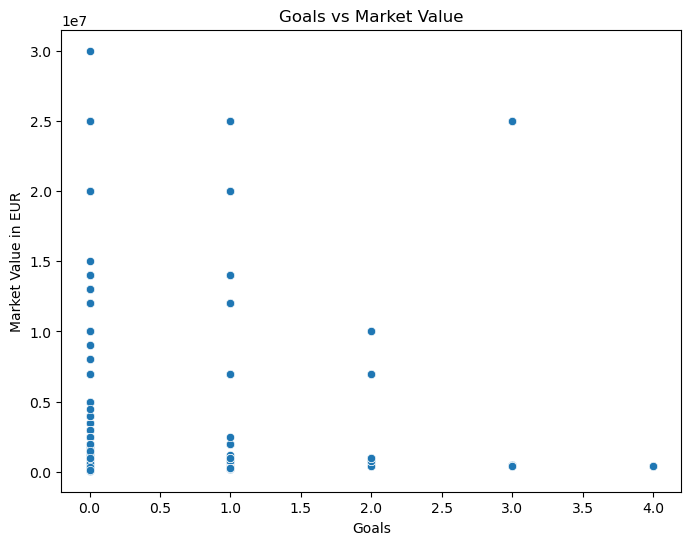

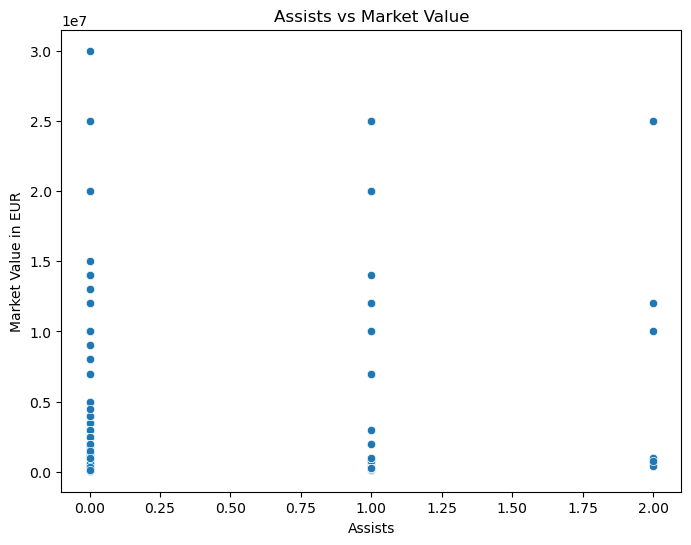

In [23]:
# Scatter plot between goals scored and market value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='goals', y='market_value_in_eur', data=df)
plt.title('Goals vs Market Value')
plt.xlabel('Goals')
plt.ylabel('Market Value in EUR')
plt.show()

# Scatter plot between assists and market value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='assists', y='market_value_in_eur', data=df)
plt.title('Assists vs Market Value')
plt.xlabel('Assists')
plt.ylabel('Market Value in EUR')
plt.show()

#### There seems to be a positive correlation between goals scored and market value. As the number of goals scored increases, there's a tendency for the market value to also increase.
#### There appears to be a positive correlation between assists and market value. As the number of assists increases, there is a tendency for the market value to also increase.

## Business Question 2: Does a player’s height, weight, or nationality influence their market value?

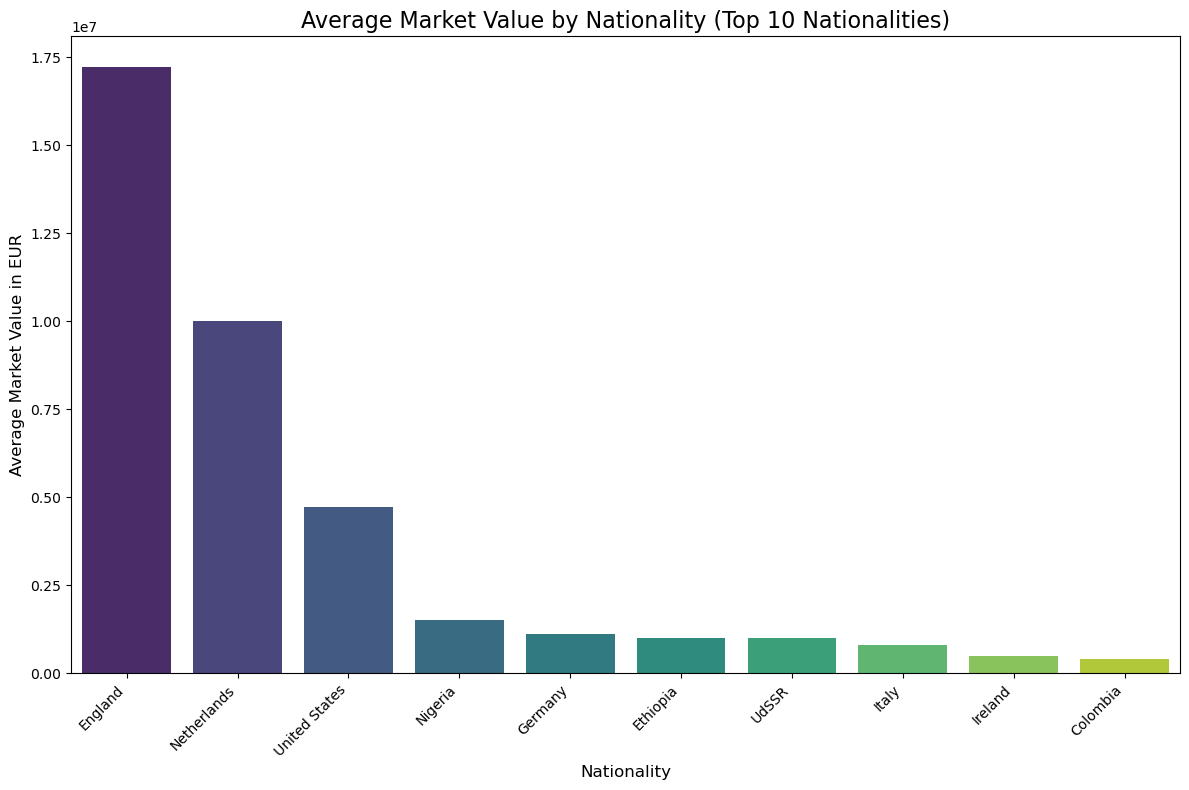

In [37]:
# Aggregating market value by nationality and selecting top N (e.g., top 10)
top_nationalities = df.groupby('country_of_birth')['market_value_in_eur'].mean().sort_values(ascending=False).head(10)

# Creating a bar plot for top 10 nationalities
plt.figure(figsize=(12, 8))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette='viridis')

# Adding titles and labels
plt.title('Average Market Value by Nationality (Top 10 Nationalities)', fontsize=16)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Average Market Value in EUR', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

#### England has the highest average market value among the top 10 nationalities.
#### The average market value decreases significantly after England, with Netherlands and United States having the next highest values.
#### The remaining nationalities (Nigeria, Germany, Ethiopia, USSR, Italy, Ireland, and Colombia) have considerably lower average market values.

### What relationship, if any, can be observed between a player's height and their market value based on the scatter plot?

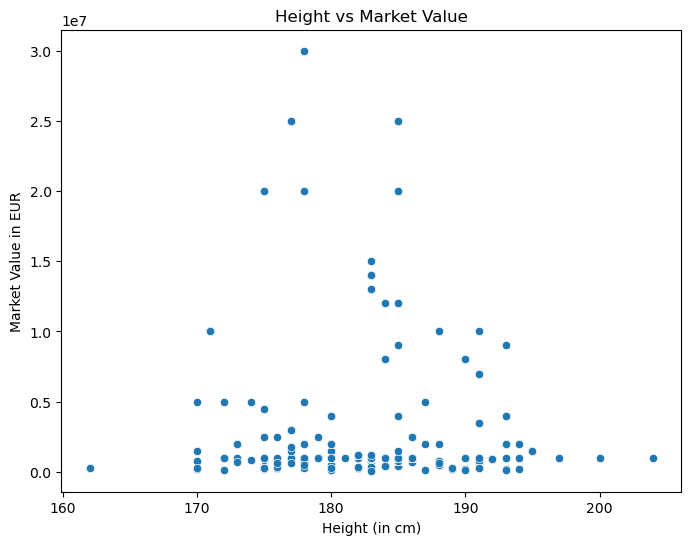

In [39]:
# Scatter plot between height and market value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height_in_cm', y='market_value_in_eur', data=df)
plt.title('Height vs Market Value')
plt.xlabel('Height (in cm)')
plt.ylabel('Market Value in EUR')
plt.show()

#### There seems to be a slight positive correlation between height and market value. As the height of the players increases, there is a tendency for the market value to also increase.

## 3. Team Comparison
## Business Question 1: Top 10 Away Clubs with Highest Average Goals

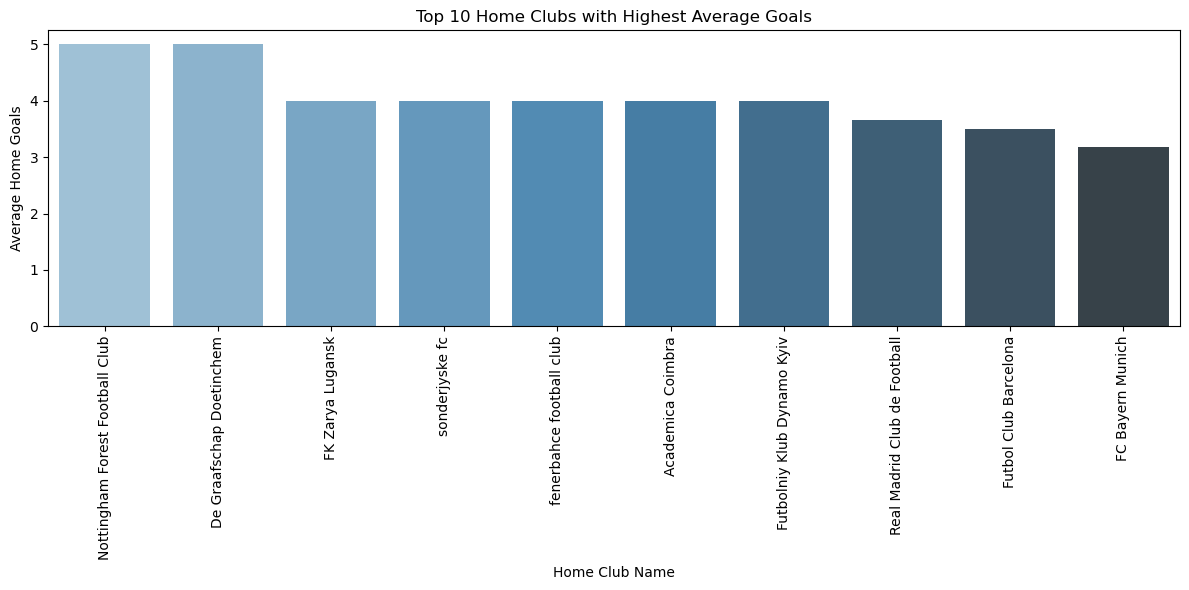

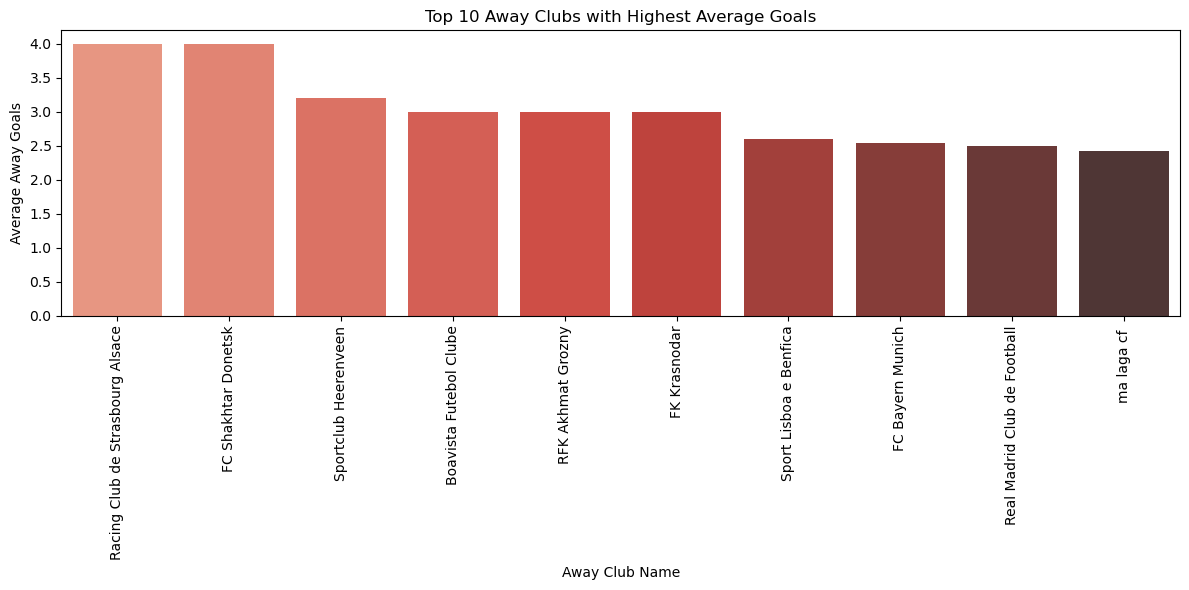

In [6]:
# Aggregating data to get the average goals per club for home and away
home_goals = df.groupby('home_club_name')['home_club_goals'].mean()
away_goals = df.groupby('away_club_name')['away_club_goals'].mean()

# Sort and select top 10 clubs based on average goals
top_home_goals = home_goals.sort_values(ascending=False).head(10)
top_away_goals = away_goals.sort_values(ascending=False).head(10)

# Plot for Top 10 Home Clubs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_home_goals.index, y=top_home_goals.values, palette="Blues_d")
plt.title('Top 10 Home Clubs with Highest Average Goals')
plt.xlabel('Home Club Name')
plt.ylabel('Average Home Goals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot for Top 10 Away Clubs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_away_goals.index, y=top_away_goals.values, palette="Reds_d")
plt.title('Top 10 Away Clubs with Highest Average Goals')
plt.xlabel('Away Club Name')
plt.ylabel('Average Away Goals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Nottingham Forest Football Club has the highest average number of home goals among the top 10 clubs.
#### The remaining clubs, including De Graafschap Doetinchem, FK Zarya Lugansk, Sonderjyske fC, Fenerbahce football club, Academica Coimbra, Futboiny klub Dynamo Kyiv, Real Madrid Club de Football, Futbol Club Barcelona, and FC Bayern Munich, have lower average numbers of home goals.

#### Racing Club de Strasbourg Alsace has the highest average number of away goals among the top 10 clubs.
#### FC Shakhtar Donetsk and Sportclub Heerenveen also have high average away goals.
#### The remaining clubs, including Boavista Futebol Clube, RFK Akhmat Grozny, FK Krasnodar, Sport Lisboa e Benfica, FC Bayern Munich, Real Madrid Club de Football, and Malaga CF, have lower average numbers of away goals.

## 4. Attendance and Stadium Analysis
## Business Question 1: Does a larger attendance at home games result in better performance (goals scored)?

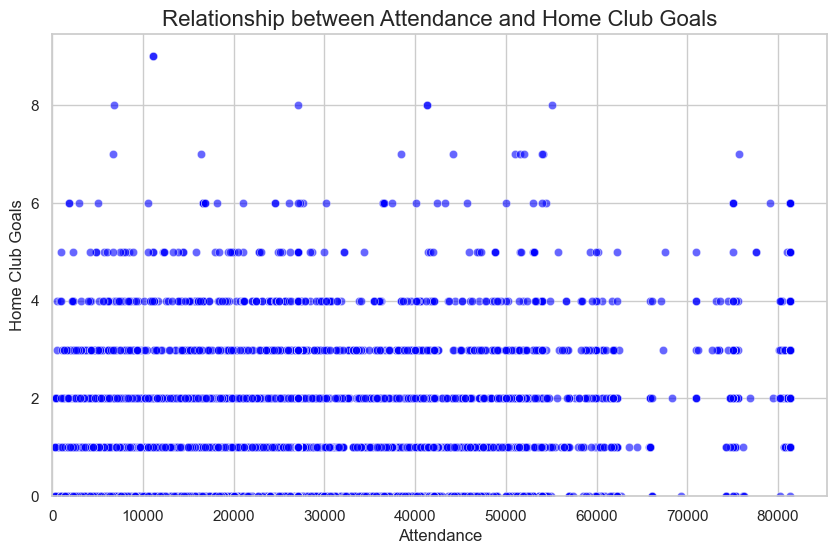

In [43]:

# Ensure the columns are numeric
df['attendance'] = pd.to_numeric(df['attendance'], errors='coerce')
df['home_club_goals'] = pd.to_numeric(df['home_club_goals'], errors='coerce')

# Drop rows with NaN values in the 'attendance' or 'home_club_goals' columns
df_clean = df.dropna(subset=['attendance', 'home_club_goals'])

# Set plot style for a cleaner look
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='attendance', y='home_club_goals', data=df_clean, color='blue', alpha=0.6)

# Add title and labels
plt.title('Relationship between Attendance and Home Club Goals', fontsize=16)
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Home Club Goals', fontsize=12)

# Improve readability by adjusting axis limits if necessary
plt.xlim(0, df_clean['attendance'].max() * 1.05)
plt.ylim(0, df_clean['home_club_goals'].max() * 1.05)

# Display the plot
plt.show()


#### There appears to be a weak positive correlation between attendance and home club goals. As the attendance increases, there is a slight tendency for the number of home club goals to also increase.
#### However, the relationship is not strong and there is a significant spread of data points. This indicates that other factors besides attendance also play a role in determining the number of goals scored by the home team.

## Business Question 2: Does the stadium affect the team's performance?

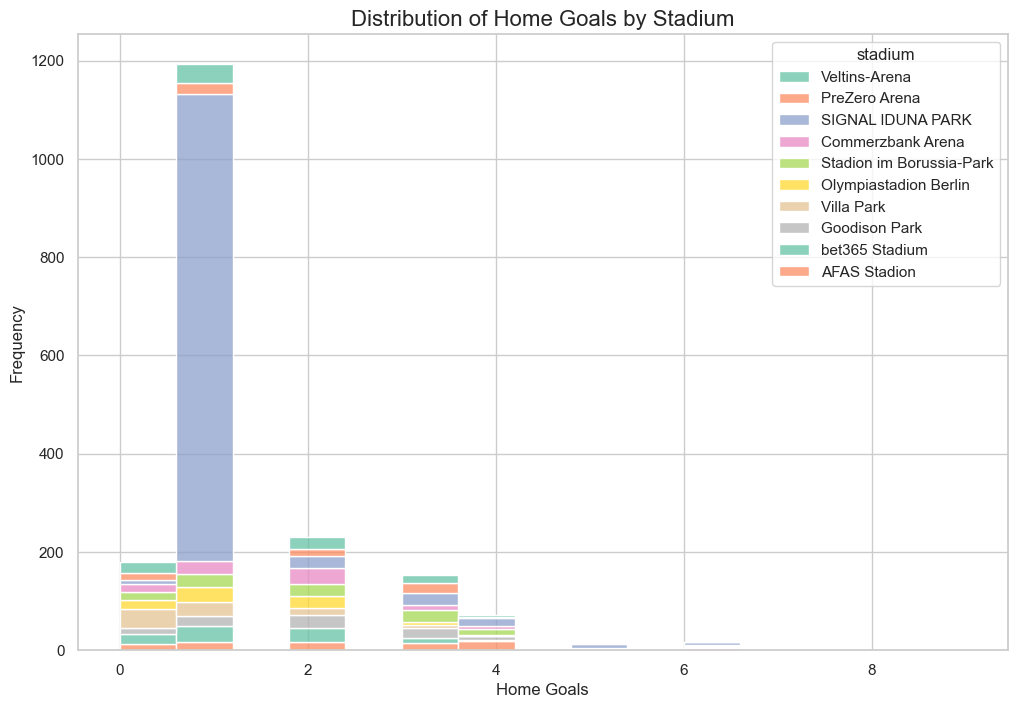

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'stadium' or 'home_club_goals' is missing
df_clean = df.dropna(subset=['stadium', 'home_club_goals'])

# Limit the number of stadiums to the top 10 based on the number of games or goals
stadium_counts = df_clean['stadium'].value_counts()
top_stadiums = stadium_counts.head(10).index  # Top 10 stadiums

# Filter the dataframe to include only the top 10 stadiums
df_top_stadiums = df_clean[df_clean['stadium'].isin(top_stadiums)]

# Set plot style for a cleaner look
sns.set(style="whitegrid")

# Create a histogram for the distribution of home club goals for each stadium
plt.figure(figsize=(12, 8))
sns.histplot(data=df_top_stadiums, x='home_club_goals', hue='stadium', multiple='stack', palette="Set2", bins=15)

# Add title and labels
plt.title('Distribution of Home Goals by Stadium', fontsize=16)
plt.xlabel('Home Goals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

#### The histogram shows that most matches in the stadiums result in a low number of home goals, with the frequency decreasing as the number of goals increases.
#### There are some stadiums with a higher frequency of matches with 0-2 home goals, while others have a slightly higher frequency of matches with 2-4 home goals.
#### The distribution of home goals varies across different stadiums. Some stadiums might have a higher frequency of low-scoring matches, while others might have a higher frequency of high-scoring matches.

## 5. Referee Analysis
## Business Question 1: Do different referees give out more yellow/red cards?

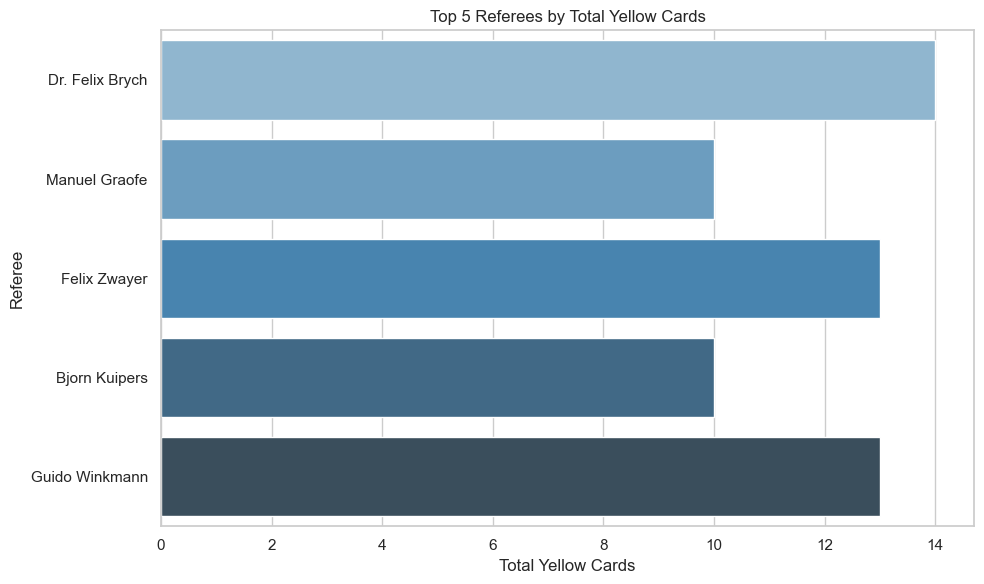

In [56]:
# Drop rows where 'referee' or 'yellow_cards' is missing
df_clean = df.dropna(subset=['referee', 'yellow_cards'])

# Get the top 5 referees based on total yellow cards
top_referees_yellow = df_clean.groupby('referee')['yellow_cards'].sum().nlargest(5).index
df_top_referees_yellow = df_clean[df_clean['referee'].isin(top_referees_yellow)]

# Plot Horizontal Bar Chart for Total Yellow Cards by Referee
plt.figure(figsize=(10, 6))
sns.barplot(x='yellow_cards', y='referee', data=df_top_referees_yellow, estimator=sum, ci=None, palette='Blues_d')
plt.title('Top 5 Referees by Total Yellow Cards')
plt.xlabel('Total Yellow Cards')
plt.ylabel('Referee')
plt.tight_layout()  # Adjust layout for readability
plt.show()

#### Dr. Felix Brych has issued the highest number of yellow cards among the top 5 referees.
#### Felix Zwayer and Guido Winkmann have also issued a significant number of yellow cards.
#### Manuel Graefe and Bjorn Kuipers have issued a lower number of yellow cards compared to the top three referees.

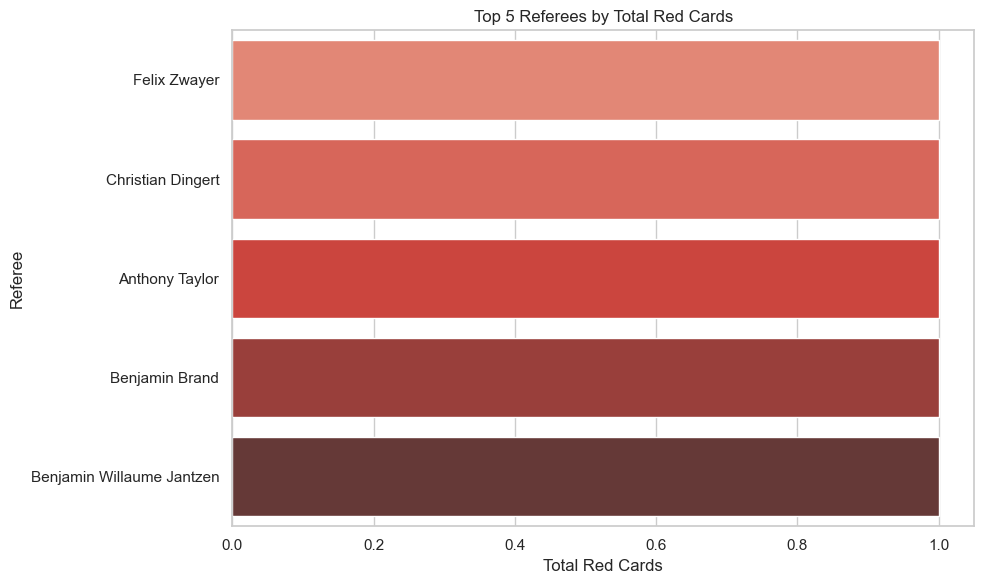

In [57]:
# Get the top 5 referees based on total red cards
top_referees_red = df_clean.groupby('referee')['red_cards'].sum().nlargest(5).index
df_top_referees_red = df_clean[df_clean['referee'].isin(top_referees_red)]

# Plot Horizontal Bar Chart for Total Red Cards by Referee
plt.figure(figsize=(10, 6))
sns.barplot(x='red_cards', y='referee', data=df_top_referees_red, estimator=sum, ci=None, palette='Reds_d')
plt.title('Top 5 Referees by Total Red Cards')
plt.xlabel('Total Red Cards')
plt.ylabel('Referee')
plt.tight_layout()  # Adjust layout for readability
plt.show()

#### Benjamin Brand and Benjamin Williaume Jantzen have issued the highest number of red cards among the top 5 referees.
#### Felix Zwayer, Christian Dingert, and Anthony Taylor have issued a lower number of red cards.

## 6. Substitution Patterns
## Business Question 1: How do substitution patterns (offensive/defensive) correlate with match outcomes?

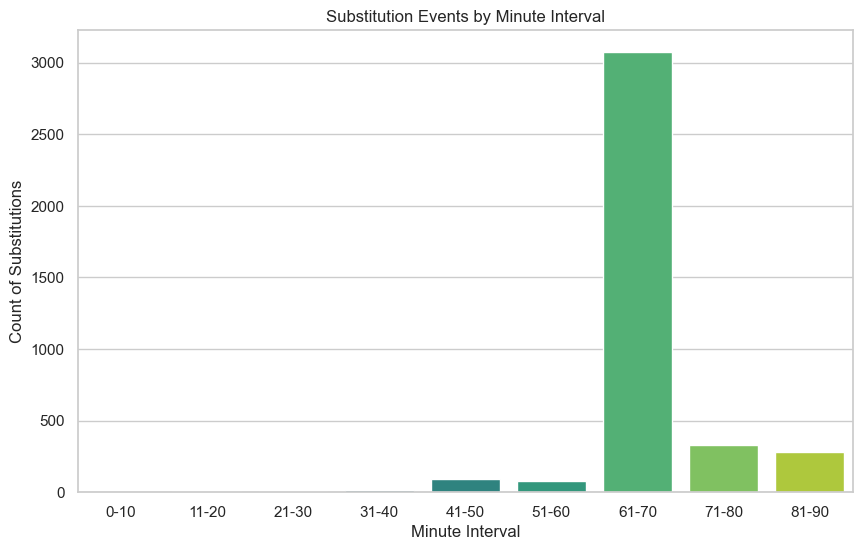

In [61]:
# Filter out the substitution events
substitution_data = df[df['type_x'] == 'Substitutions']

# Create bins for minutes (e.g., 0-10, 11-20, 21-30, ...)
minute_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
minute_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Add a new column 'minute_group' for the binned minute intervals
substitution_data['minute_group'] = pd.cut(substitution_data['minute'], bins=minute_bins, labels=minute_labels, right=False)

# Plotting the substitution events by binned minute intervals
plt.figure(figsize=(10, 6))
sns.countplot(x='minute_group', data=substitution_data, palette='viridis')
plt.title('Substitution Events by Minute Interval')
plt.xlabel('Minute Interval')
plt.ylabel('Count of Substitutions')
plt.show()

#### The most frequent substitution interval is 61-70 minutes, with a significantly higher number of substitutions compared to other intervals.
#### The next highest frequency occurs in the 81-90 minute interval, suggesting a considerable number of substitutions happen towards the end of the match.
#### The least frequent substitution intervals are 0-10 minutes and 11-20 minutes, indicating that substitutions are less common at the very beginning of the match.

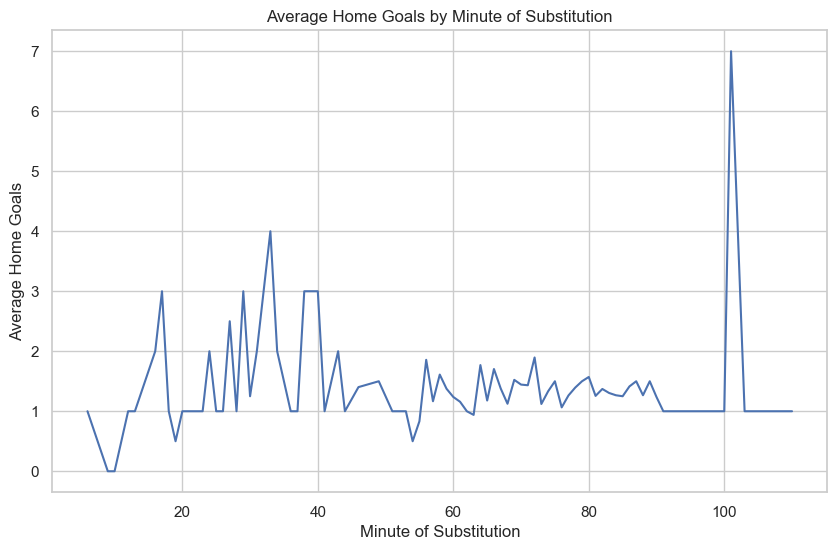

In [62]:
# Analysis of substitution timing and match outcomes
substitutions_vs_goals = substitution_data.groupby('minute')['home_club_goals'].mean()
substitutions_vs_goals.plot(kind='line', figsize=(10, 6))
plt.title('Average Home Goals by Minute of Substitution')
plt.xlabel('Minute of Substitution')
plt.ylabel('Average Home Goals')
plt.show()

#### The graph shows a fluctuating pattern with some notable spikes.
#### There are several spikes where the average home goals increase significantly. These spikes suggest that substitutions made at these specific minutes might be associated with a higher likelihood of the home team scoring goals.
#### There are also periods where the line remains relatively flat, indicating that substitutions made during those minutes might have less impact on the home team's goal-scoring ability.

## 7. Event Analysis
## Business Question 1: Does the occurrence of yellow cards correlate with the number of goals

                 yellow_cards  home_club_goals
yellow_cards         1.000000         0.030786
home_club_goals      0.030786         1.000000


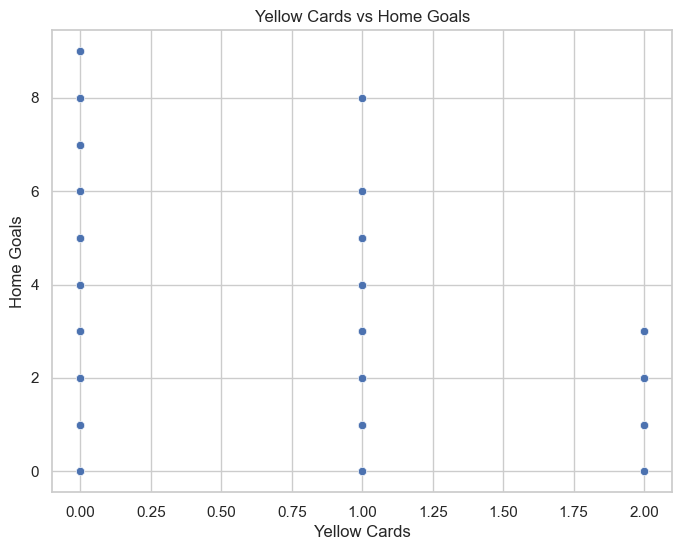

In [63]:
# Correlation between yellow cards and home goals
yellow_cards_goals_corr = df[['yellow_cards', 'home_club_goals']].corr()
print(yellow_cards_goals_corr)

# Plotting a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='yellow_cards', y='home_club_goals', data=df)
plt.title('Yellow Cards vs Home Goals')
plt.xlabel('Yellow Cards')
plt.ylabel('Home Goals')
plt.show()

#### There doesn't appear to be a clear or strong correlation between yellow cards received and home goals scored.
#### The data points are scattered across the plot, indicating that the number of goals scored by the home team is not significantly influenced by the number of yellow cards they receive.

## 8. Competition Analysis
## Business Question 1: What are the distribution of home goals across different competition types?

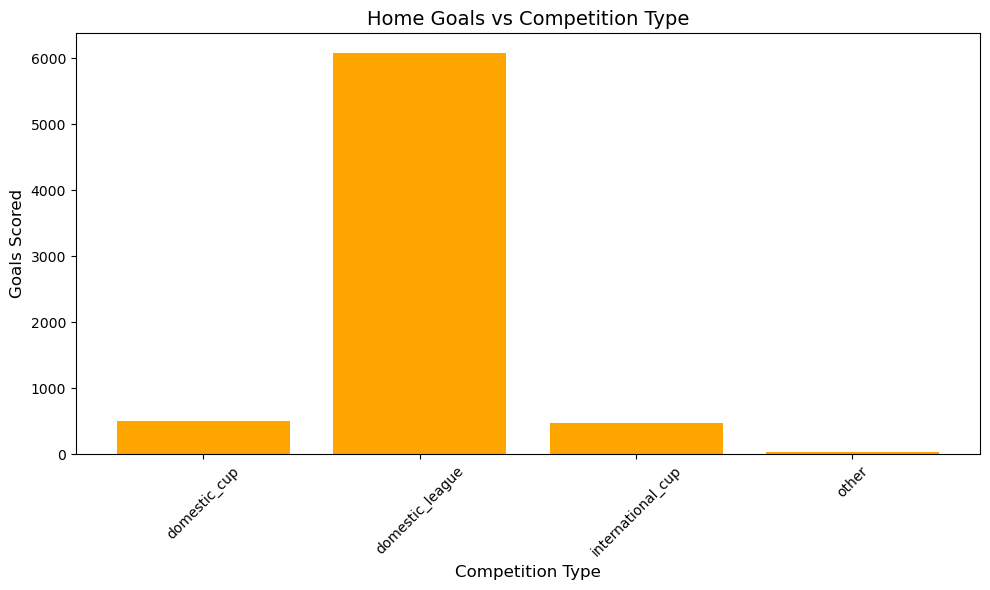

In [9]:
import matplotlib.pyplot as plt

# Group data by competition type and sum the home goals
home_goals = df.groupby('competition_type')['home_club_goals'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(home_goals.index, home_goals.values, color='orange',)

# Add titles and labels
plt.title('Home Goals vs Competition Type', fontsize=14)
plt.xlabel('Competition Type', fontsize=12)
plt.ylabel('Goals Scored', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### "other" competition type shows the widest distribution, with a higher frequency of matches having a higher number of home goals.
#### "international_cup" also shows a relatively wide distribution with a higher frequency of matches having a higher number of home goals.
#### "domestic_cup" and "domestic_league" have more compact distributions with a lower frequency of matches having a higher number of home goals.

## 9. Player Attributes and Demographics
## Business Question 1: How does a player’s age affect their performance (goals scored, assists)?

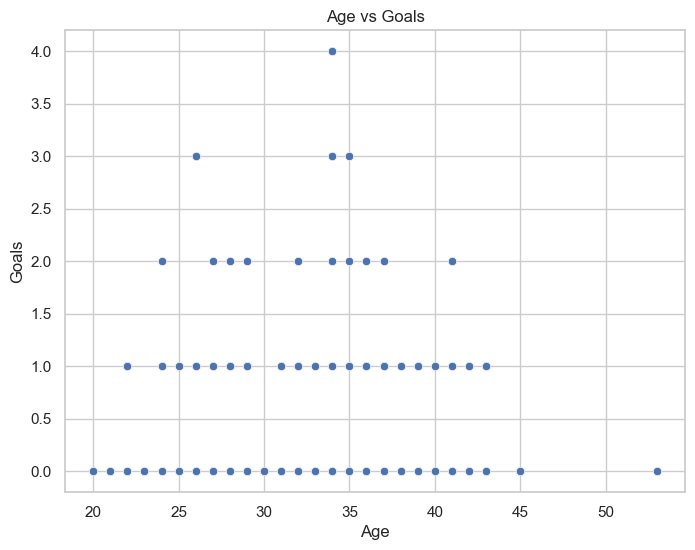

In [70]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the player's age from the 'date_of_birth' column
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['age'] = (datetime.now() - df['date_of_birth']).dt.days // 365

# Now plot the scatter plot for Age vs Goals
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='goals', data=df)
plt.title('Age vs Goals')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()

#### The scatter plot suggests that while age can be a factor, it's not the sole determinant of goal-scoring ability. Players of different ages can score a varying number of goals.

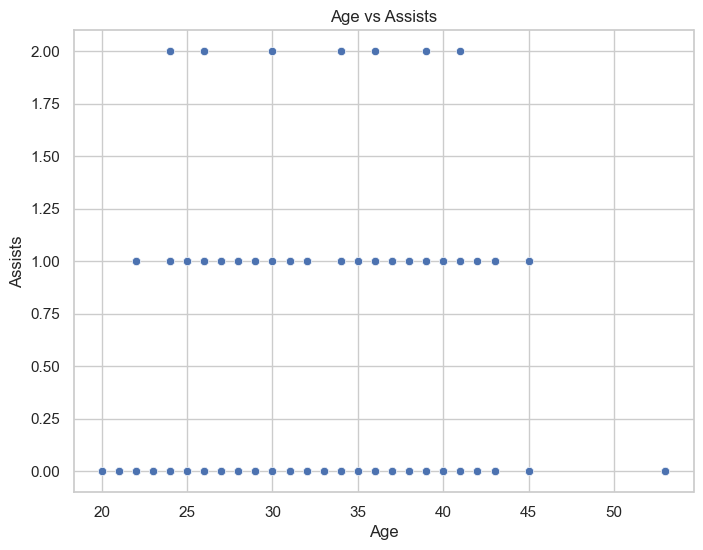

In [72]:
# Scatter plot between age and assists
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='assists', data=df)
plt.title('Age vs Assists')
plt.xlabel('Age')
plt.ylabel('Assists')
plt.show()

#### There doesn't appear to be a strong or clear linear relationship between age and assists.
#### The data points are scattered across the plot, indicating that age alone does not determine the number of assists a player provides.

## 10. Contract Management
## Business Question 1: Does a player’s market value change as their contract expiration date approaches?

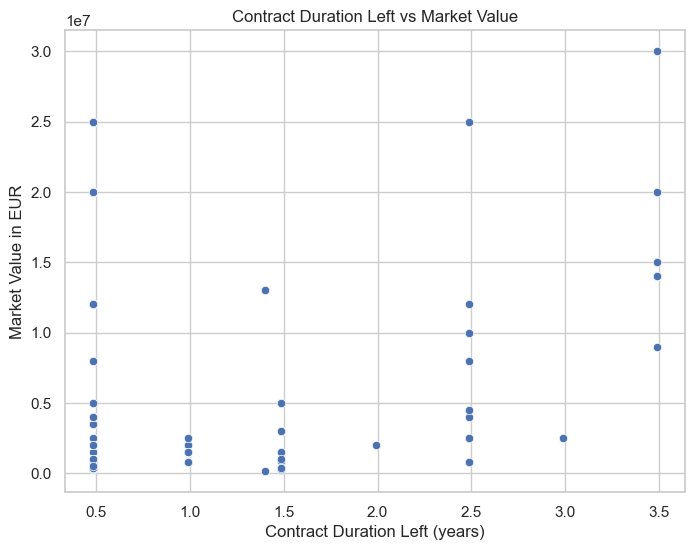

In [77]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert contract expiration date to datetime format
df['contract_expiration_date'] = pd.to_datetime(df['contract_expiration_date'])

# Calculate the remaining contract duration in years
df['contract_duration_left'] = (df['contract_expiration_date'] - pd.to_datetime('today')).dt.days / 365

# Ensure that contract_duration_left and market_value_in_eur are numeric
df['contract_duration_left'] = pd.to_numeric(df['contract_duration_left'], errors='coerce')
df['market_value_in_eur'] = pd.to_numeric(df['market_value_in_eur'], errors='coerce')

# Filter out invalid or negative values
df = df[df['contract_duration_left'] >= 0]
df = df[df['market_value_in_eur'] > 0]

# Scatter plot between contract duration left and market value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='contract_duration_left', y='market_value_in_eur', data=df)
plt.title('Contract Duration Left vs Market Value')
plt.xlabel('Contract Duration Left (years)')
plt.ylabel('Market Value in EUR')
plt.show()

#### There doesn't appear to be a strong or clear linear relationship between contract duration left and market value.
#### The data points are scattered across the plot, indicating that contract duration left alone does not determine the market value.